In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
np.random.seed(1)

In [2]:
import os
os.getcwd()

'/Users/dileepunnikrishnan'

# Importing and Cleaning table

In [3]:
tnn = pd.read_csv('/Users/dileepunnikrishnan/desktop/NN_source_file(1).csv', index_col=[0])
tnn.shape

(1647, 34)

In [4]:
tnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 1 to 1647
Data columns (total 34 columns):
Name                  1647 non-null object
CPMRN                 1629 non-null object
Month.of.Admission    1647 non-null object
Age                   1647 non-null int64
Gender                1647 non-null object
Hospital              1647 non-null object
History               1647 non-null object
Surgery               1647 non-null object
Vent.mode             1623 non-null object
GCS                   1647 non-null int64
Temparature           1647 non-null object
HR                    1647 non-null float64
SpO2                  1647 non-null int64
SBP                   1647 non-null float64
MAP                   1647 non-null float64
RR                    1647 non-null int64
FiO2                  1647 non-null float64
PaO2                  1647 non-null float64
PaCO2                 1647 non-null float64
pH                    1647 non-null float64
A.a.gradient          1647 non

In [5]:
tnn['Temparature'] = pd.to_numeric(tnn['Temparature'], errors='coerce')
tnn.Temparature = tnn.Temparature.replace(np.nan, 98.6)
sum(tnn.Temparature.isnull())

0

In [6]:
tnn['Month.of.Admission'].unique()

array(['July 2018', 'August 2018', 'September 2018', 'October 2018',
       'November 2018', 'December 2018', 'January 2019', 'February 2019',
       'July 0201', 'January 2018', 'August 2015', 'February 2018',
       'February 0219'], dtype=object)

In [7]:
tnn['Month.of.Admission'] = tnn['Month.of.Admission'].replace('July 0201', 'July 2018')
tnn['Month.of.Admission'] = tnn['Month.of.Admission'].replace('January 2018', 'January 2019')
tnn['Month.of.Admission'] = tnn['Month.of.Admission'].replace('August 2015', 'August 2018')
tnn['Month.of.Admission'] = tnn['Month.of.Admission'].replace('February 2018', 'February 2019')
tnn['Month.of.Admission'] = tnn['Month.of.Admission'].replace('February 0219', 'February 2019')

In [8]:
tnn['Vent.mode'].value_counts()

RA           555
Mask         407
Cannula      332
ETT          171
High Flow     95
Trach         63
Name: Vent.mode, dtype: int64

In [9]:
tnn['Vent.mode'] = tnn['Vent.mode'].replace(np.nan, 'RA')

In [10]:
tnn2 = tnn.drop(['Name', 'CPMRN', 'History', 'SBP'], axis=1)

In [34]:
tnn_trim = tnn.drop(['Name', 'CPMRN', 'History', 'SBP', 'Month.of.Admission', 'Gender', 'Hospital'], axis=1)

In [11]:
tnn2.columns

Index(['Month.of.Admission', 'Age', 'Gender', 'Hospital', 'Surgery',
       'Vent.mode', 'GCS', 'Temparature', 'HR', 'SpO2', 'MAP', 'RR', 'FiO2',
       'PaO2', 'PaCO2', 'pH', 'A.a.gradient', 'HCO3', 'Hb', 'TLC', 'Platelets',
       'K', 'Na', 'Serum.Cr', 'Blood.Urea', 'Bili', 'Urine.output', 'Lactate',
       'INR', 'Survival'],
      dtype='object')

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])))
    return df
tnn_scaled = scaleColumns(tnn2, ['Age', 'GCS', 'Temparature', 'HR', 'SpO2', 'MAP', 'RR', 'FiO2', 
                                          'PaO2', 'PaCO2', 'pH', 'A.a.gradient', 'HCO3', 'Hb', 'TLC', 'Platelets', 
                                         'K', 'Na', 'Serum.Cr', 'Blood.Urea', 'Bili', 'Urine.output', 'Lactate', 
                                         'INR'])
tnt_scaled = scaleColumns(tnn_trim, ['Age', 'GCS', 'Temparature', 'HR', 'SpO2', 'MAP', 'RR', 'FiO2', 
                                          'PaO2', 'PaCO2', 'pH', 'A.a.gradient', 'HCO3', 'Hb', 'TLC', 'Platelets', 
                                         'K', 'Na', 'Serum.Cr', 'Blood.Urea', 'Bili', 'Urine.output', 'Lactate', 
                                         'INR'])

/Users/dileepunnikrishnan/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/dileepunnikrishnan/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/dileepunnikrishnan/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/dileepunnikrishnan/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/dileepunnikrishnan/anacon

### Changing dtypes of numerics from float64 to float32

In [36]:
names = np.array(tnn_scaled.columns)
for i in range(len(names)):
    if tnn_scaled[names[i]].dtype == 'float64':
        tnn_scaled[names[i]] = tnn_scaled[names[i]].astype('float32')
names2 = np.array(tnt_scaled.columns)
for i in range(len(names2)):
    if tnt_scaled[names2[i]].dtype == 'float64':
        tnt_scaled[names2[i]] = tnt_scaled[names2[i]].astype('float32')
tnn_scaled.info()
tnt_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 1 to 1647
Data columns (total 30 columns):
Month.of.Admission    1647 non-null object
Age                   1645 non-null float32
Gender                1647 non-null object
Hospital              1647 non-null object
Surgery               1647 non-null object
Vent.mode             1647 non-null object
GCS                   1645 non-null float32
Temparature           1645 non-null float32
HR                    1645 non-null float32
SpO2                  1645 non-null float32
MAP                   1645 non-null float32
RR                    1645 non-null float32
FiO2                  1645 non-null float32
PaO2                  1645 non-null float32
PaCO2                 1645 non-null float32
pH                    1645 non-null float32
A.a.gradient          1645 non-null float32
HCO3                  1645 non-null float32
Hb                    1645 non-null float32
TLC                   1645 non-null float32
Platelets         

In [40]:
tnn3 = pd.get_dummies(tnn_scaled, drop_first=True)
tnt3 = pd.get_dummies(tnt_scaled, drop_first=True)

In [44]:
tnn3 = tnn3.dropna()
tnt3 = tnt3.dropna()

In [45]:
print(tnn3.columns)
print(tnt3.columns)

Index(['Age', 'GCS', 'Temparature', 'HR', 'SpO2', 'MAP', 'RR', 'FiO2', 'PaO2',
       'PaCO2', 'pH', 'A.a.gradient', 'HCO3', 'Hb', 'TLC', 'Platelets', 'K',
       'Na', 'Serum.Cr', 'Blood.Urea', 'Bili', 'Urine.output', 'Lactate',
       'INR', 'Month.of.Admission_December 2018',
       'Month.of.Admission_February 2019', 'Month.of.Admission_January 2019',
       'Month.of.Admission_July 2018', 'Month.of.Admission_November 2018',
       'Month.of.Admission_October 2018', 'Month.of.Admission_September 2018',
       'Gender_Male', 'Hospital_Brains-MVJ', 'Hospital_Brains-SSNMC',
       'Hospital_HCG DR', 'Hospital_HCG EKO', 'Hospital_HCG Hubli',
       'Hospital_HCG Vijayawada', 'Hospital_MRNH', 'Hospital_Prashant',
       'Surgery_Emergency surgery', 'Surgery_Non-Operative', 'Vent.mode_ETT',
       'Vent.mode_High Flow', 'Vent.mode_Mask', 'Vent.mode_RA',
       'Vent.mode_Trach', 'Survival_Expired'],
      dtype='object')
Index(['Age', 'GCS', 'Temparature', 'HR', 'SpO2', 'MAP', 'RR', 'FiO

In [51]:
print(tnn3.shape)
print(tnt3.shape)

(1645, 48)
(1646, 32)


In [52]:
X = tnn3.iloc[:, 0:47].values; Y = tnn3.iloc[:, 47].values.reshape(-1, 1); 
print(X.shape); print(Y.shape);

(1645, 47)
(1645, 1)


In [53]:
x = tnt3.iloc[:, 0:31].values; y = tnt3.iloc[:, 31].values.reshape(-1, 1);
print(x.shape); print(y.shape);

(1646, 31)
(1646, 1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Regression Model

### Coeff Table function

In [19]:
def report_coef(names, coef, intercept):
    r = pd.DataFrame({ 'coef': coef, 'positive': coef>=0 }, index = names)
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept: {}".format(intercept))
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False:'r'}))

### Lin Regression Model using trim dataset

In [26]:
from sklearn import metrics

Final score (RMSE): 0.2073076367378235


,coef,positive
Urine.output,-8.454492e-03,False
SpO2,-6.434484e-03,False
Age,-5.719082e-03,False
Hb,-4.607815e-03,False
Lactate,-4.516630e-03,False
PaCO2,-4.073118e-03,False
PaO2,-2.748742e-03,False
INR,-2.590961e-03,False
K,-2.468763e-03,False
MAP,-1.536714e-03,False


Intercept: [-0.018854]


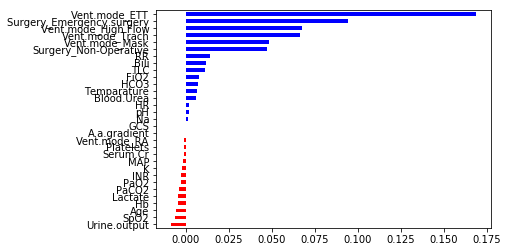

In [55]:
import sklearn.linear_model
import sklearn.metrics

# Creating model
regressor = sklearn.linear_model.LinearRegression()

# Fit and train
regressor.fit(x_train, y_train)
# Predict
pred = regressor.predict(x_test)

# RMSE Error
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

names = list(tnt3.columns.values)
names.remove('Survival_Expired')
report_coef(
    names, 
    regressor.coef_[0,:], 
    regressor.intercept_)

### Lasso Regularization - trim dataset

Final score (RMSE): 0.2131815105676651


,coef,positive
Urine.output,-0.001670,False
SpO2,-0.001588,False
Hb,-0.000691,False
Age,-0.000000,True
Vent.mode_Mask,-0.000000,True
Vent.mode_High Flow,0.000000,True
Surgery_Non-Operative,0.000000,True
Surgery_Emergency surgery,0.000000,True
INR,-0.000000,True
Lactate,-0.000000,True


Intercept: [0.04475664]


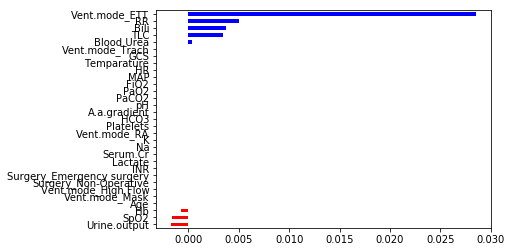

In [58]:
import sklearn.linear_model
import sklearn.metrics
from sklearn.linear_model import Lasso

# Creating model
regressor = Lasso(random_state=0, alpha=0.01)

# Fit and train
regressor.fit(x_train, y_train)
# Predict
pred = regressor.predict(x_test)

# RMSE Error
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print("Final score (RMSE): {}".format(score))

names = list(tnt3.columns.values)
names.remove('Survival_Expired')
report_coef(
    names, 
    regressor.coef_, 
    regressor.intercept_)